In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
salaryDB = pd.read_csv('../../data/Salary Data.csv')
salaryDB.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
salaryDB.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [7]:
print("Missing values:")
print(salaryDB.isnull().sum())

Missing values:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


<Axes: xlabel='Years of Experience', ylabel='Salary'>

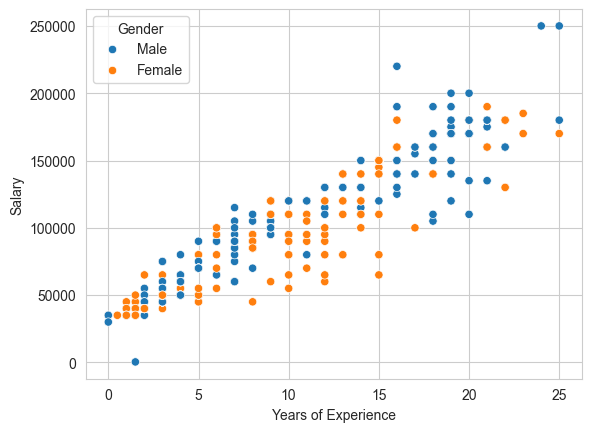

In [21]:
sns.scatterplot(x='Years of Experience', y='Salary', data=salaryDB, hue='Gender' )

<Axes: xlabel='Gender', ylabel='Salary'>

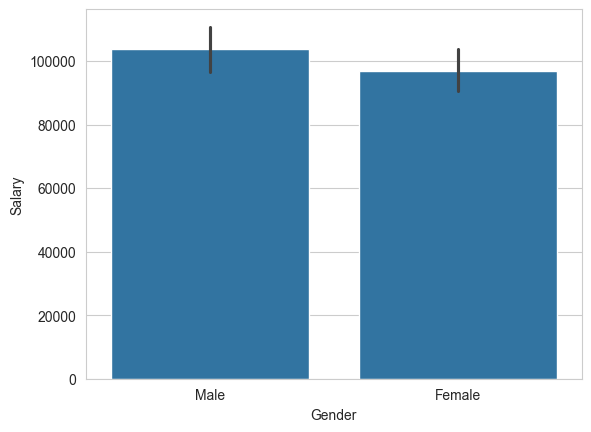

In [22]:
sns.barplot(data=salaryDB,x='Gender' , y='Salary' )

In [24]:
salaryDB['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [26]:
salaryDB['Job Title'].value_counts()

Job Title
Director of Marketing             12
Director of Operations            11
Senior Business Analyst           10
Senior Marketing Manager           9
Senior Marketing Analyst           9
                                  ..
Junior Social Media Specialist     1
Junior Operations Coordinator      1
Senior HR Specialist               1
Director of HR                     1
Junior Financial Advisor           1
Name: count, Length: 174, dtype: int64

In [29]:
# Add this in a new cell

# First, let's check correlations for numerical variables
numerical_cols = salaryDB.select_dtypes(include=[np.number]).columns
print("Numerical columns:", list(numerical_cols))

# Calculate correlation matrix
correlation_matrix = salaryDB[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix['Age'])


Numerical columns: ['Age', 'Years of Experience', 'Salary']

Correlation Matrix:
Age                    1.000000
Years of Experience    0.979128
Salary                 0.922335
Name: Age, dtype: float64


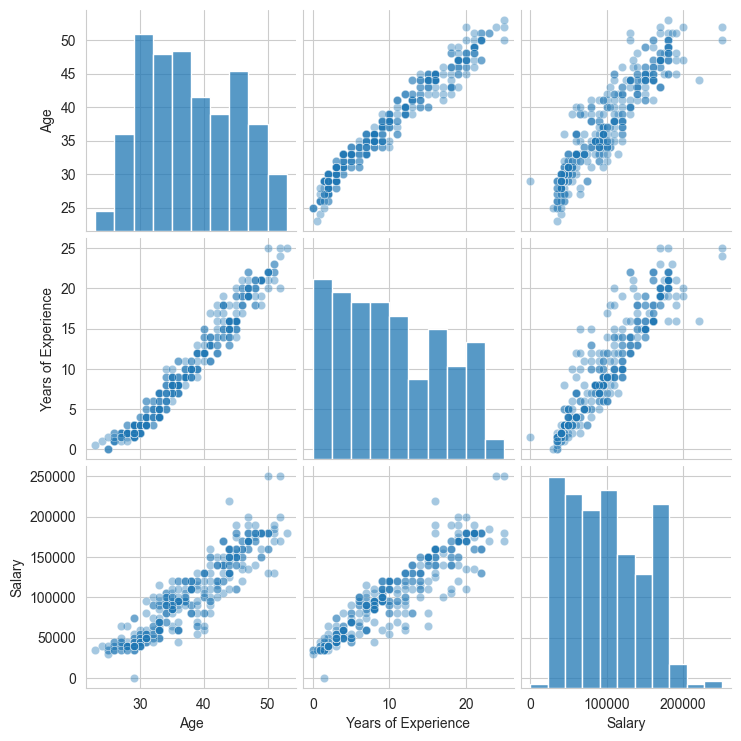

In [32]:
sns.pairplot(salaryDB, kind='scatter' , plot_kws={'alpha': 0.4})

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical columns for VIF calculation
numerical_cols = salaryDB.select_dtypes(include=[np.number]).columns
X = salaryDB[numerical_cols].dropna()  # Drop rows with NaN for VIF calculation

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

               feature        VIF
0                  Age  13.460439
1  Years of Experience  21.234831
2               Salary  40.674826


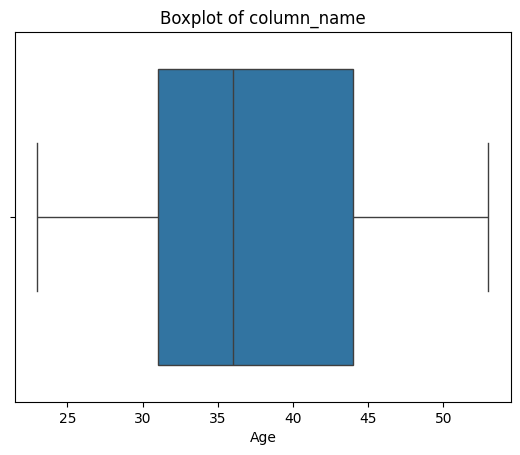

In [15]:
# Replace 'column_name' with your actual column
sns.boxplot(x='Age', data=salaryDB)
plt.title("Boxplot of column_name")
plt.show()
